# Блокнот №2 к Лекции №3. Простейшее обучение с sklearn

## Зависимости

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,
    mean_squared_error, mean_absolute_error, r2_score
)

In [2]:
SEED = 42
np.random.seed(SEED)

## Регрессия

In [3]:
cal = fetch_california_housing(as_frame=True)
Xr, yr = cal.data, cal.target

Xr_tr, Xr_te, yr_tr, yr_te = train_test_split(
    Xr, yr, test_size=0.25, random_state=SEED
)

### Напишем самый тупой бейзлайн -- модель, которая возвращает среднее

In [5]:
class MeanRegressor(BaseEstimator, RegressorMixin):

    def __init__(self):
        self.y_mean = None
        
    def fit(self, X, y):
        self.y_mean = float(np.mean(y))
        print(f'Mean value of the target: {self.y_mean}')
        
        return self
        
    def predict(self, X):
        return np.full(shape=(len(X),), fill_value=self.y_mean, dtype=float)

In [6]:
baseline_reg = MeanRegressor().fit(Xr_tr, yr_tr)
yr_pred = baseline_reg.predict(Xr_te)

print("RMSE:", mean_squared_error(yr_te, yr_pred))
print("MAE :", mean_absolute_error(yr_te, yr_pred))
print("R^2 :", round(r2_score(yr_te, yr_pred), 4))

Mean value of the target: 2.0703489205426355
RMSE: 1.3232694135654075
MAE : 0.9100474990475331
R^2 : -0.0


### Чуть менее тупое решение -- самая дефолтная линейная регрессия

In [7]:
reg = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

reg.fit(Xr_tr, yr_tr)
yr_pred = reg.predict(Xr_te)

In [8]:
print("RMSE:", mean_squared_error(yr_te, yr_pred))
print("MAE :", mean_absolute_error(yr_te, yr_pred))
print("R^2 :", round(r2_score(yr_te, yr_pred), 4))

RMSE: 0.5411287478470688
MAE : 0.5296964012919462
R^2 : 0.5911


## Классификация

In [9]:
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, random_state=SEED, stratify=y
)

### Самый тупой безйлайн для классификации -- алгоритм, который случайно угадывает один из классов

In [10]:
np.random.default_rng(42)

Generator(PCG64) at 0x7F8204DB2340

In [11]:
class RandomClassClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self):
        pass
        
    def fit(self, X, y):
        self.classes_ = np.unique(np.asarray(y))
        return self
    
    def predict(self, X):
        return np.random.choice(self.classes_, size=len(X))
    
    def predict_proba(self, X):
        n = len(X)
        k = len(self.classes_)
        return np.full((n, k), 1.0 / k)


In [12]:
baseline_clf = RandomClassClassifier().fit(X_tr, y_tr)
y_pred_base = baseline_clf.predict(X_te)

print("accuracy:", accuracy_score(y_te, y_pred_base))
print(classification_report(y_te, y_pred_base, target_names=data.target_names))

accuracy: 0.5174825174825175
              precision    recall  f1-score   support

   malignant       0.38      0.45      0.41        53
      benign       0.63      0.56      0.59        90

    accuracy                           0.52       143
   macro avg       0.50      0.50      0.50       143
weighted avg       0.54      0.52      0.52       143



In [13]:
y_pred_base

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [14]:
baseline_clf.predict_proba(X_te)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

### Что-то менее тупое -- логистическая регрессия

In [15]:
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000))
])
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

accuracy: 0.986013986013986
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        53
      benign       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



<Figure size 400x400 with 0 Axes>

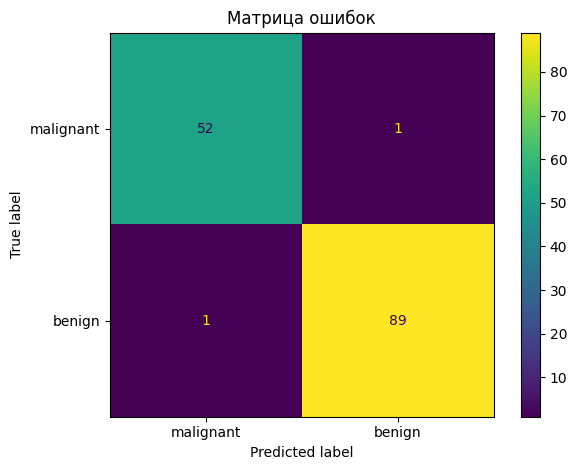

In [16]:
print("accuracy:", accuracy_score(y_te, y_pred))
print(classification_report(y_te, y_pred, target_names=data.target_names))

fig = plt.figure(figsize=(4, 4))
ConfusionMatrixDisplay(confusion_matrix(y_te, y_pred), display_labels=data.target_names).plot(values_format="d")
plt.title("Матрица ошибок")
plt.tight_layout()
plt.show()
